In [ ]:
class Array2DADT: 
    def __init__( self , ren , col ):
        self.__pollo = [ [ 0 for y in range(col) ] for x in range(ren) ] 
    def clear ( self , dato ):
        self.__pollo = [ [ dato for y in range(self.get_col_size())]for x in range(self.get_row_size()) ] 
    def get_row_size( self ):
        return len( self.__pollo )
    def get_col_size( self ):
        return len( self.__pollo[0] )
    def set_item( self , ren, col, dato ):
        self.__pollo[ren][col]= dato
    
    def get_item( self , ren, col ):
        return self.__pollo[ren][col]
    def to_string( self ):
      
        cadena = ""
        for renglon in self.__pollo:
            cadena = cadena + "|"
            for dato in renglon:
                cadena = cadena + str(dato) + "|"
            cadena = cadena + "\n"
        return cadena

       

In [ ]:
a2d = Array2DADT( 3, 6 )
print(f"Ren:{ a2d.get_row_size() }")
print(f"Col: { a2d.get_col_size() }")
print(a2d.to_string())
print(" ")
a2d.clear("M")
print(a2d.to_string())

a2d.set_item(2,3,'p')
print(a2d.to_string())
print(a2d.get_item(2 , 3))


In [ ]:
dir(list)

In [ ]:
"""
La entrada
Los datos iniciales como lo son:
1 .- Tamaño de la poblacion (ren y cols)
2 .-La poblacion inicial
3.- El numero de generaciones a simular estaran proporcionadas por un archivo de entrada separado por comas(csv)
5
5

0,0,0,0,0
0,0,1,0,0
0,1,1,1,0
0,0,0,0,0
0,0,0,0,0

"""

class JuegoDeLaVida:
    def __init__ ( self, ruta_archivo ):
        self.rens = None
        self.cols = None
        self.tablero = None
        self.generaciones = None
        self.read_game_data( ruta_archivo )

    def read_game_data( self, archivo ):
       #método que recibe la ruta del archivo, lee y da valores
       archivo = open(archivo, 'rt')
       lineas = archivo.readlines()
       #quitar espacios en blanco y saltos de línea
       for index in range(len(lineas)):
           lineas[index] = lineas[index].strip()
       #print(lineas)
       
       self.rens = int( lineas[0] )
       self.cols = int( lineas[1] )
       self.tablero = Array2DADT(self.rens, self.cols)
       #variables locales
       r = 0
       c = 0
       for index in range( 2, 2 + self.rens , 1 ):
           c = 0
           for dato in lineas[index].split( ',' ):
               self.tablero.set_item( r , c , int(dato) )
               c += 1
           r += 1

       self.generaciones = int( lineas [ len(lineas) - 1] ) # int( lineas[-1])
       print( "Gens:", self.generaciones)
       print(self.tablero.to_string())

    def get_vecinos( self, r , c):
        vecinos = []
        for ren in range( r-1 , r+2 , 1 ):
            for col in range(c-1 , c+2 , 1):
                if ren < 0 or ren >= self.tablero.get_row_size() or col < 0 or col >= self.tablero.get_col_size() or (ren==r and col==c):
                    pass
                else:
                    vecinos.append((ren,col))
        return vecinos
    def get_vecinos_vivos( self, r, c ):
        vecinos = self.get_vecinos(r, c)
        vivos = 0
        for par in vecinos:
            if self.tablero.get_item( par[0], par[1] ) == 1:
                vivos += 1
        return vivos
            
    def calcular_siguinte(self ):
        nueva_gen = Array2DADT(self.rens, self.cols)
        #Aplicar 4 reglas a cada celula y el resultado ponerlo en nueva_gen
        for ren in range( self ):
            for col in range( sel.cols ):
                print(f"{ren},{col} --> {self.get_vecinos_vivos(ren, col)}")
        self.tablero = nueva_gen




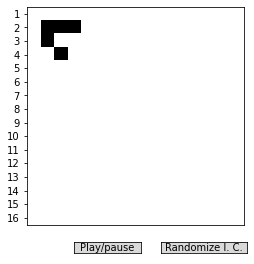

In [1]:
from time import sleep

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation

import random
from matplotlib.widgets import Button

def vecindario(b):
    #Array celularas vivas 
    vecindario = (
        np.roll(np.roll(b, 1, 1), 1, 0) +  # Abajo-derecha
        np.roll(b, 1, 0) +  # Abajo
        np.roll(np.roll(b, -1, 1), 1, 0) +  # Abajo-izquierda
        np.roll(b, -1, 1) +  # Izquierda
        np.roll(np.roll(b, -1, 1), -1, 0) +  # Arriba-izquierda
        np.roll(b, -1, 0) +  # Arriba
        np.roll(np.roll(b, 1, 1), -1, 0) +  # Arriba-derecha
        np.roll(b, 1, 1)  # Derecha
    )
    return vecindario


def paso(b):
    v = vecindario(b)
    buffer_b = b.copy()  # Hacemos una copia de la matriz
    for i in range(buffer_b.shape[0]):
        for j in range(buffer_b.shape[1]):
            if v[i, j] == 3 or (v[i, j] == 2 and buffer_b[i, j]):
                buffer_b[i, j] = 1
            else:
                buffer_b[i, j] = 0
    return buffer_b


# Parámetros
GENERACIONES = 100
N = 16 # Dimensiones del tablero (N, M)
M = N

pause = True 
def onClick(event):
    global pause
    pause ^= True

#Tablero
tablero = np.zeros((N, M), dtype = int)
tablero[1, 1:4] = 1
tablero[2, 1] = 1
tablero[3, 2] = 1

def randomize(event):
    for i in range(0, N-1):
        for j in range(0, N-1):
            tablero[i, j] = random.randint(0, 1)
    global b
    b = tablero
    imagen.set_data(b)
    print(tablero)

# Creamos la figura
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
b = tablero 
imagen = ax.imshow(b, interpolation="none", aspect = "equal", cmap=cm.gray_r)


ax.set_yticks(np.arange(0, N, 1));


ax.set_yticklabels(np.arange(1, N+1, 1));

plt.tick_params(    
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

def animate(i):
    global b

    if not pause:
        print(i) 
        b = paso(b) 
        
        imagen.set_data(b)
    
    return imagen,


pause_ax = fig.add_axes((0.3, 0.025, 0.23, 0.04), anchor = 'SE')
pause_button = Button(pause_ax, 'Play/pause', hovercolor='0.975')
pause_button.on_clicked(onClick)

random_ax = fig.add_axes((0.6, 0.025, 0.3, 0.04), anchor = 'SW')
random_button = Button(random_ax, 'Randomize I. C.', hovercolor='0.975')
random_button.on_clicked(randomize)

# Animacion 
anim = animation.FuncAnimation(fig, animate, frames=GENERACIONES, blit=True, interval = 200, repeat = True)
plt.show()

In [2]:
juego = JuegoDeLaVida( "entrada.txt" )

NameError: ignored